Se agregó una columna promedio para indicar si el precio de renta está por arriba del promedio, y es lo que se intenta predecir
La primer red es con algunas columnas del datasete original, lo dejo en el drive, con los datos originales y la segunda es con los datos escalados



In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/airbnb_clean.csv')
df.head()

room_type  accommodates  bathrooms  cancellation_policy  cleaning_fee  \
0          2             2        0.0                    3             1   
1          3             2        1.0                    3             1   
2          3             4        1.0                    3             1   
3          2             3        1.0                    3             1   
4          3             5        2.0                    3             1   

      city  host_response_rate  review_scores_rating  bedrooms  beds  price  
0      NYC                 100                    89         1     1     50  
1       LA                   0                    98         1     1    199  
2      NYC                  80                    94         0     2     85  
3       LA                 100                    95         1     2     70  
4  Chicago                 100                    88         2     2     72

In [9]:
df["price"].mean()

159.95879435973552

In [12]:
#df['promedio'] = [1 if df['price'] >= df["price"].mean() else 0]
df['promedio'] = np.where(df['price']>= df["price"].mean(), 1, 0)

In [13]:
df.head()

room_type  accommodates  bathrooms  cancellation_policy  cleaning_fee  \
0          2             2        0.0                    3             1   
1          3             2        1.0                    3             1   
2          3             4        1.0                    3             1   
3          2             3        1.0                    3             1   
4          3             5        2.0                    3             1   

      city  host_response_rate  review_scores_rating  bedrooms  beds  price  \
0      NYC                 100                    89         1     1     50   
1       LA                   0                    98         1     1    199   
2      NYC                  80                    94         0     2     85   
3       LA                 100                    95         1     2     70   
4  Chicago                 100                    88         2     2     72   

   promedio  
0         0  
1         1  
2         0  
3         0  
4         0

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['city'] = le.fit_transform(df['city'])
df.head()

room_type  accommodates  bathrooms  cancellation_policy  cleaning_fee  \
0          2             2        0.0                    3             1   
1          3             2        1.0                    3             1   
2          3             4        1.0                    3             1   
3          2             3        1.0                    3             1   
4          3             5        2.0                    3             1   

   city  host_response_rate  review_scores_rating  bedrooms  beds  price  \
0     4                 100                    89         1     1     50   
1     3                   0                    98         1     1    199   
2     4                  80                    94         0     2     85   
3     3                 100                    95         1     2     70   
4     1                 100                    88         2     2     72   

   promedio  
0         0  
1         1  
2         0  
3         0  
4         0

In [16]:
X = df.drop(columns=["price","promedio"])
y = df["promedio"]

In [17]:
X.shape

(59288, 10)

In [31]:
def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

In [18]:
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=1)

In [19]:
b_model = tf.keras.Sequential([l0,l1,l2])

In [20]:
b_model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(53359, 10) (5929, 10) (53359,) (5929,)


In [25]:
history = b_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/100
1501/1501 [==============================] - 5s 3ms/step - loss: 0.1700 - val_loss: 0.1505
Epoch 2/100
1501/1501 [==============================] - 4s 2ms/step - loss: 0.1627 - val_loss: 0.1372
Epoch 3/100
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1587 - val_loss: 0.1772
Epoch 4/100
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1545 - val_loss: 0.2002
Epoch 5/100
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1511 - val_loss: 0.1458
Epoch 6/100
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1501 - val_loss: 0.1396
Epoch 7/100
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1460 - val_loss: 0.1370
Epoch 8/100
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1452 - val_loss: 0.1358
Epoch 9/100
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1412 - val_loss: 0.1431
Epoch 10/100
1501/1501 [==============================] - 3s 2ms/step - l

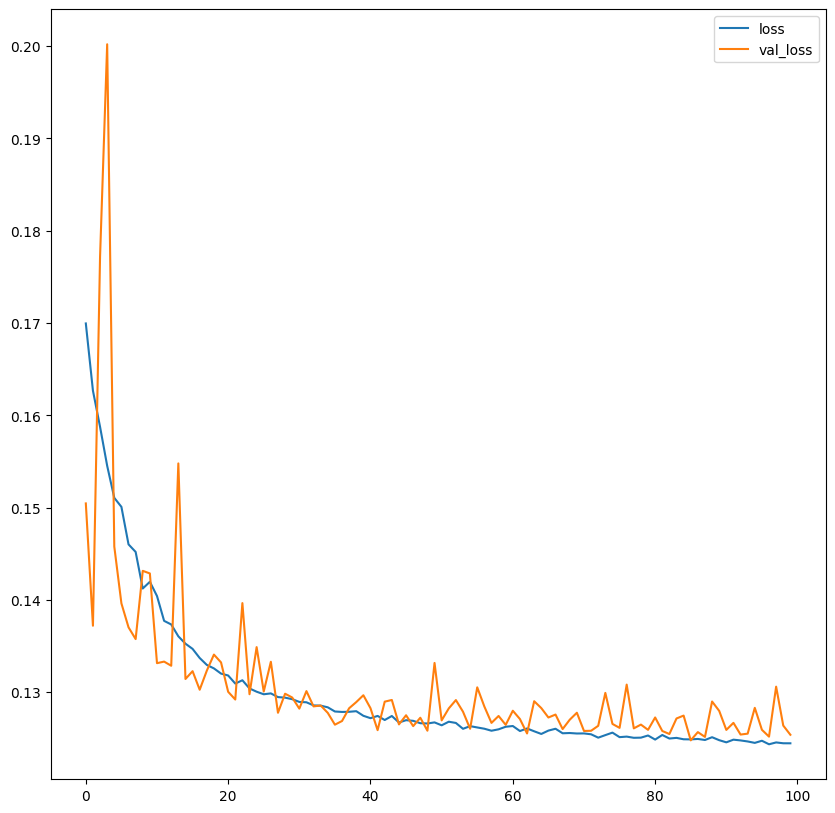

In [26]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

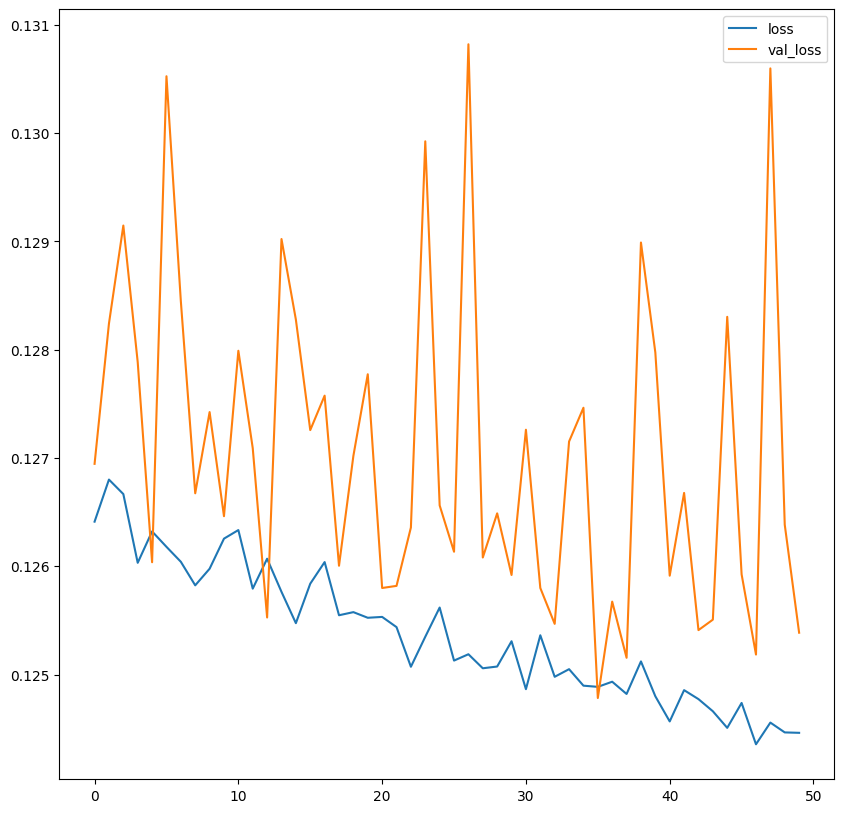

In [27]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history.history["loss"][50:100], label="loss")
plt.plot(history.history["val_loss"][50:100], label="val_loss")

plt.legend(loc="upper right")

In [28]:
y_pred = b_model.predict(X_test)

186/186 [==============================] - 0s 2ms/step


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test, y_pred)

0.403422721115701

SEGUNDA RED

In [32]:
X = escalar_a_01(X)

In [33]:
X

room_type  accommodates  bathrooms  cancellation_policy  cleaning_fee  \
0            0.5      0.066667     0.0000                 0.50           1.0   
1            1.0      0.066667     0.1250                 0.50           1.0   
2            1.0      0.200000     0.1250                 0.50           1.0   
3            0.5      0.133333     0.1250                 0.50           1.0   
4            1.0      0.266667     0.2500                 0.50           1.0   
...          ...           ...        ...                  ...           ...   
59283        1.0      0.266667     0.2500                 0.25           1.0   
59284        1.0      0.066667     0.1875                 0.50           1.0   
59285        1.0      0.133333     0.1250                 0.25           1.0   
59286        1.0      0.133333     0.1250                 0.50           1.0   
59287        1.0      0.866667     0.3750                 0.50           1.0   

       city  host_response_rate  review_scores_rating  bedrooms      beds  
0       0.8                1.00                  0.89       0.1  0.055556  
1       0.6                0.00                  0.98       0.1  0.055556  
2       0.8                0.80                  0.94       0.0  0.111111  
3       0.6                1.00                  0.95       0.1  0.111111  
4       0.2                1.00                  0.88       0.2  0.111111  
...     ...                 ...                   ...       ...       ...  
59283   0.6                1.00                  0.88       0.3  0.166667  
59284   0.8                1.00                  1.00       0.1  0.055556  
59285   0.6                0.33                  0.00       0.1  0.111111  
59286   0.8                0.86                  1.00       0.1  0.055556  
59287   0.6                0.84                  0.93       0.4  0.277778  

[59288 rows x 10 columns]

In [34]:
l0 = tf.keras.layers.Dense(units=64, input_shape=([X.shape[1]]), activation="relu")
l1 = tf.keras.layers.Dense(units=32, activation="relu")
l2 = tf.keras.layers.Dense(units=1)

In [35]:
b_model3 = tf.keras.Sequential([l0,l1,l2])
b_model3.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.001))

In [36]:
history3 = b_model3.fit(X_train, y_train, epochs=500, batch_size=32, verbose=True, validation_split=0.1)

Epoch 1/500
1501/1501 [==============================] - 4s 2ms/step - loss: 0.4238 - val_loss: 0.1484
Epoch 2/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1644 - val_loss: 0.1622
Epoch 3/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1640 - val_loss: 0.1496
Epoch 4/500
1501/1501 [==============================] - 4s 2ms/step - loss: 0.1610 - val_loss: 0.1543
Epoch 5/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1562 - val_loss: 0.1518
Epoch 6/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1563 - val_loss: 0.1408
Epoch 7/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1510 - val_loss: 0.1374
Epoch 8/500
1501/1501 [==============================] - 4s 3ms/step - loss: 0.1512 - val_loss: 0.1396
Epoch 9/500
1501/1501 [==============================] - 3s 2ms/step - loss: 0.1477 - val_loss: 0.1485
Epoch 10/500
1501/1501 [==============================] - 3s 2ms/step - l

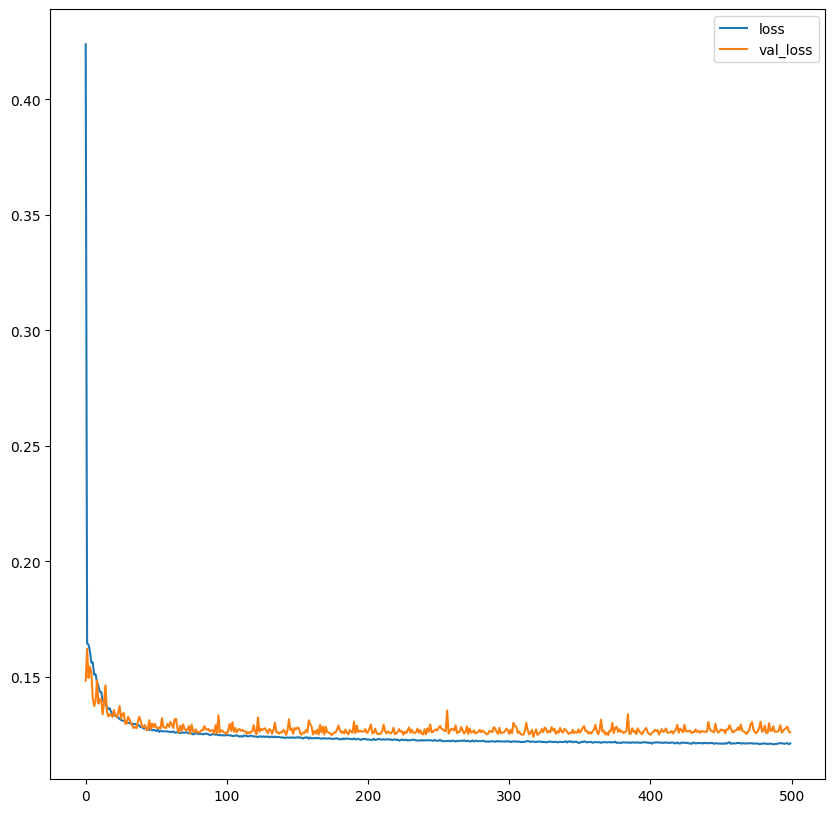

In [37]:
fig = plt.figure(figsize=(10, 10))

plt.plot(history3.history["loss"], label="loss")
plt.plot(history3.history["val_loss"], label="val_loss")

plt.legend(loc="upper right")

In [38]:
y_pred = b_model3.predict(X_test)

186/186 [==============================] - 0s 1ms/step


In [39]:
r2_score(y_test, y_pred)

0.4084010868955197